In [99]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [100]:
#loading the dataset from tensorflow

(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()

In [101]:
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape,'\n')
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (50000, 32, 32, 3)
Shape of y_train :  (50000, 1) 

Shape of x_test :  (10000, 32, 32, 3)
Shape of y_test :  (10000, 1)


**60,000 images with 50,000 for training and 10,000 for testing**

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
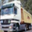

In [102]:
x_train[1]

In [103]:
y_train[1]

array([9], dtype=uint8)

In [104]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

In [105]:
class_count = [list(y_train.flatten()).count(i) for i in range(len(class_names))]
print("Class names:", class_names)
print("Class counts:", class_count)

Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Class counts: [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


In [106]:
# Ensure input data type is float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the data
x_train /= 255.0
x_test /= 255.0

In [107]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [108]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

In [109]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 1024)            

In [110]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
print("---------Training Started-----------\n")

history=model.fit(x_train, y_train, epochs=100, validation_split=0.1, batch_size=64)

print("\n-----------Training Finished--------------")

---------Training Started-----------

Epoch 1/100
704/704 [==============================] - 6s 6ms/step - loss: 1.7891 - accuracy: 0.3772 - val_loss: 1.5472 - val_accuracy: 0.4740
Epoch 2/100
704/704 [==============================] - 3s 5ms/step - loss: 1.5112 - accuracy: 0.4892 - val_loss: 1.4171 - val_accuracy: 0.5360
Epoch 3/100
704/704 [==============================] - 4s 5ms/step - loss: 1.4179 - accuracy: 0.5324 - val_loss: 1.3304 - val_accuracy: 0.5714
Epoch 4/100
704/704 [==============================] - 4s 5ms/step - loss: 1.3460 - accuracy: 0.5639 - val_loss: 1.2450 - val_accuracy: 0.6050
Epoch 5/100
704/704 [==============================] - 3s 5ms/step - loss: 1.2908 - accuracy: 0.5879 - val_loss: 1.2229 - val_accuracy: 0.6110
Epoch 6/100
704/704 [==============================] - 3s 5ms/step - loss: 1.2479 - accuracy: 0.6070 - val_loss: 1.1161 - val_accuracy: 0.6592
Epoch 7/100
704/704 [==============================] - 4s 6ms/step - loss: 1.2049 - accuracy: 0.6256 - v

In [112]:
print("Model Evalutaion Phase.\n")
loss,accuracy=model.evaluate(x_test,y_test)
print(f'Accuracy: {round(accuracy*100,2)}')
print("--------------------------------------\n")
y_pred=model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

Model Evalutaion Phase.

313/313 [==============================] - 1s 3ms/step - loss: 0.9030 - accuracy: 0.7590
Accuracy: 75.9
--------------------------------------

313/313 [==============================] - 1s 2ms/step


In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

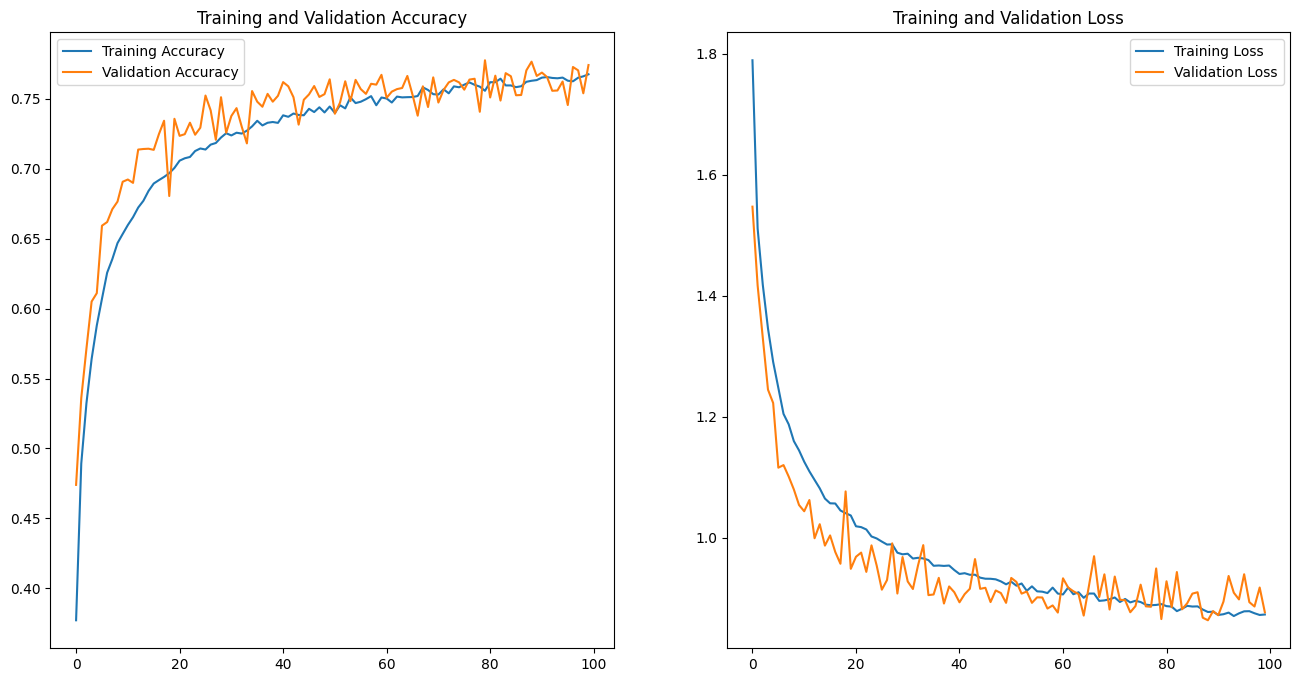

In [114]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range(100), acc, label='Training Accuracy')
plt.plot(range(100), val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(100), loss, label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

In [115]:
model.save("cifar_CNN_75_test.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
